# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    return x**2 * numpy.sin(x)

Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [5]:
def g(x):
    return 2*x * numpy.sin(x) - (x**2 - 2) * numpy.cos(x) - 2

Check your solution with the same numpy array:

In [6]:
assert g(0) == 0.

In [7]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [8]:
def integrate_analytic(xmin, xmax):
    return g(xmax) - g(xmin)

Check your analytic function:

In [9]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [12]:
def integrate_numeric(xmin, xmax, N):
    dx = (xmax-xmin)/N  
    #strip width
    
    A = numpy.arange(1, N)
    B = xmin + A*dx
    C = f(B)
    D = 2*numpy.sum(C)
    #D is the sum of the x_1, x_2, etc values of the function multiplied by 2
    
    E = numpy.arange(0, N)
    F = xmin + dx*(1/2 + E)
    G = f(F)
    H = 4*numpy.sum(G)
    #H is the sum of the midpoint values of the function multiplied by 4
    
    return dx/6 *(f(xmax)+ f(xmin)+ D+ H)



Make sure you have implemented Simpson's rule correctly:

In [13]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [14]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


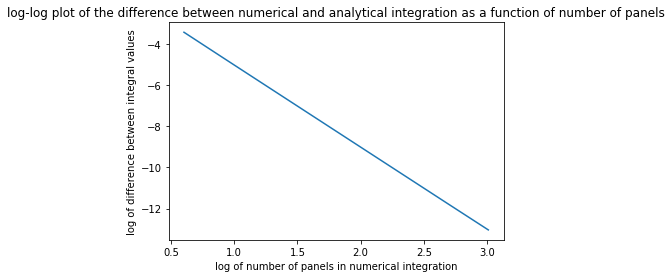

In [26]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = numpy.array([4, 8, 16, 32, 64, 128, 256, 512, 1024])  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
W = [integrate_numeric(x0,x1,4), integrate_numeric(x0,x1,8), integrate_numeric(x0,x1,16), integrate_numeric(x0,x1,32), integrate_numeric(x0,x1,64), integrate_numeric(x0,x1,128), integrate_numeric(x0,x1,256), integrate_numeric(x0,x1,512), integrate_numeric(x0,x1,1024)]

yvalues = result_analytic - W
xvalues = ([4, 8, 16, 32, 64, 128, 256, 512, 1024])
plt.plot(numpy.log10(xvalues), numpy.log10(yvalues))
plt.xlabel('log of number of panels in numerical integration')
plt.ylabel('log of difference between integral values')
plt.title('log-log plot of the difference between numerical and analytical integration as a function of number of panels')
plt.show()



What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Up until the multiples of 1000 panels, increasing the number of panels improves the accuracy of the numerical method. For a greaeter number of panels, a numerical rounding issue begins to intefere with the result and the accuracy begins to decrease for as we approach 10 to the power of 5 or 6. 

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The increase in panel count would also increase accuracy, but it would happen at a much slower rate compared to Simpson's rule. The trapezium rule woudln't be affected by a rounding issue until after 10 to the power of 6 panels, but it is worth nothing that its accuracy at these points is still less than that of simpson's rule. 